# PIG and HIVE MovieLens Analysis
The following notebook will be used to analyse the MovieLens dataset that accompanies the first assignment for the CA4022 module. We will produce various visualization to explain the distribution of the data and relationships within it.

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Read in data
movies_ratings = pd.read_csv('../data/m_r_joined', sep='\t',
                             names=['movieid','title','year','genres','userid','rating','timestamp'])
#Drop any missing values
movies_ratings.dropna(inplace=True)

#Reset the index
movies_ratings.reset_index(inplace=True, drop=True)
movies_ratings.head()

,movieid,title,year,genres,userid,rating,timestamp
0,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",314,3.0,834398280
1,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",240,5.0,849122434
2,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",500,4.0,1005527755
3,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",90,3.0,856353996
4,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",89,3.0,1520408314


In [4]:
#Test for nulls
movies_ratings.isnull().any()

movieid      False
title        False
year         False
genres       False
userid       False
rating       False
timestamp    False
dtype: bool

In [226]:
#Count the number of ratings per movie
most_ratings=movies_ratings[['movieid', 'title', 'rating']].groupby(by=['movieid', 'title']).sum().sort_values(by='movieid', ascending=True)
count_rating=movies_ratings[['movieid', 'title', 'rating']].groupby(by=['movieid', 'title']).count().sort_values(by='movieid', ascending=True)

In [227]:
avg_rate = most_ratings.divide(count_rating, axis=0).rename({'rating':'average_rating'}, axis=1)

In [228]:
#Some manipulation
m_r_avg = movies_ratings.merge(right=avg_rate, on=['movieid', 'title'])

In [229]:
m_r=m_r_avg.merge(right=count_rating, on=['movieid', 'title']).drop('rating_x', axis=1).rename({'rating_y':'rating_count'}, axis=1)

In [230]:
m_r_a_c = m_r[['movieid','title' , 'average_rating', 'rating_count']].drop_duplicates()

In [231]:
#So Now we have a list of the top 100 rated movies with over 100 ratings
m_r_a_c=m_r_a_c[m_r_a_c['rating_count'] > 100].sort_values(by='average_rating', ascending=False).iloc[:101,:]

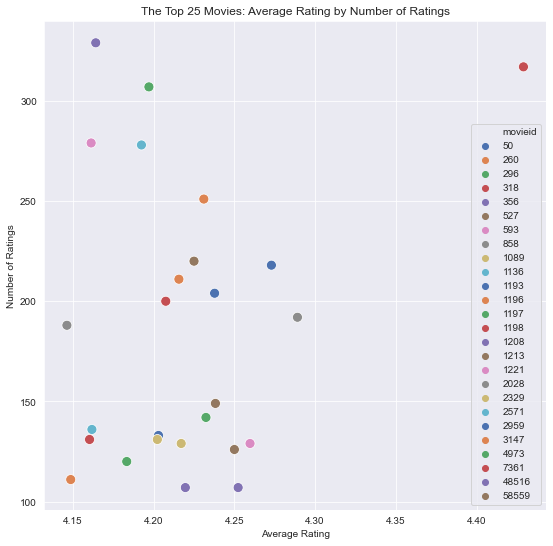

In [299]:
sns.set_style("darkgrid")
import seaborn as sns
plt.figure(figsize=(9,9))

sns.scatterplot(data= m_r_a_c.iloc[:26,:], x='average_rating', y='rating_count', hue='movieid', palette='deep', s=100)
plt.title('The Top 25 Movies: Average Rating by Number of Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.savefig("avgrating.png")
plt.show()

In [248]:
most_ratings = m_r_a_c.sort_values(by='rating_count', ascending=False)
most_ratings.head()

,movieid,title,average_rating,rating_count
10019,356,Forrest Gump,4.164134,329
8652,318,The Shawshank Redemption,4.429022,317
7860,296,Pulp Fiction,4.197068,307
16228,593,The Silence of the Lambs,4.161290,279
45014,2571,The Matrix,4.192446,278


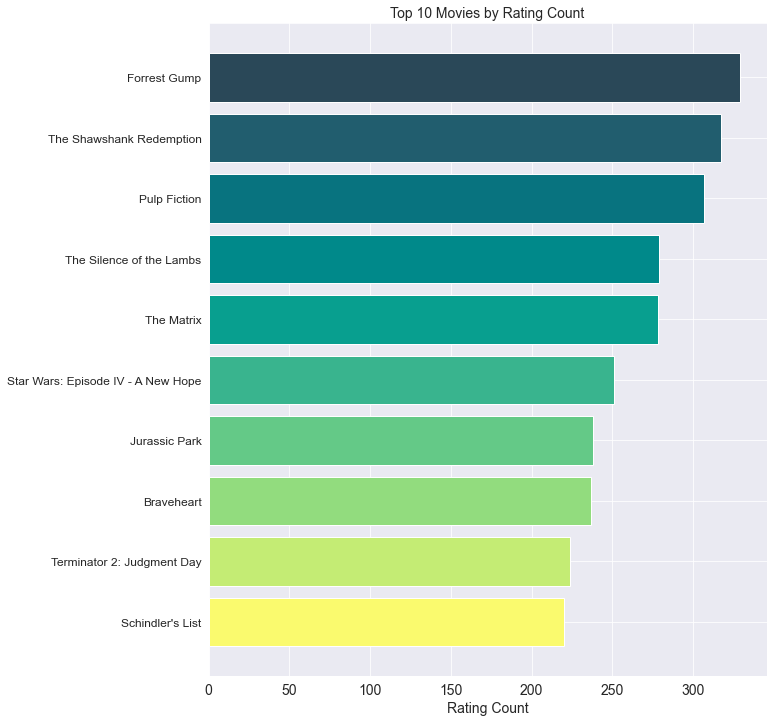

In [379]:
plt.figure(figsize=(10,12))

colors = ['#fafa6e','#c4ec74','#92dc7e','#64c987','#39b48e','#089f8f','#00898a','#08737f','#215d6e','#2a4858']

plt.barh(most_ratings.iloc[:10].sort_values(by='rating_count', ascending=1).title, most_ratings.iloc[:10].sort_values(by='rating_count', ascending=1).rating_count,
        color=colors)

plt.title("Top 10 Movies by Rating Count", fontsize=14)
plt.xlabel("Rating Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.savefig("topmovies.png")
plt.show()

In [380]:
least_ratings = m_r_a_c[m_r_a_c['rating_count'] > 25]
least_ratings.sort_values(by='average_rating', ascending=1, inplace=True)
least_ratings.head()

,movieid,title,average_rating,rating_count
4802,165,Die Hard: With a Vengeance,3.555556,144
68569,5816,Harry Potter and the Chamber of Secrets,3.598039,102
9721,349,Clear and Present Danger,3.604545,110
4602,161,Crimson Tide,3.635922,103
67135,5445,Minority Report,3.637500,120


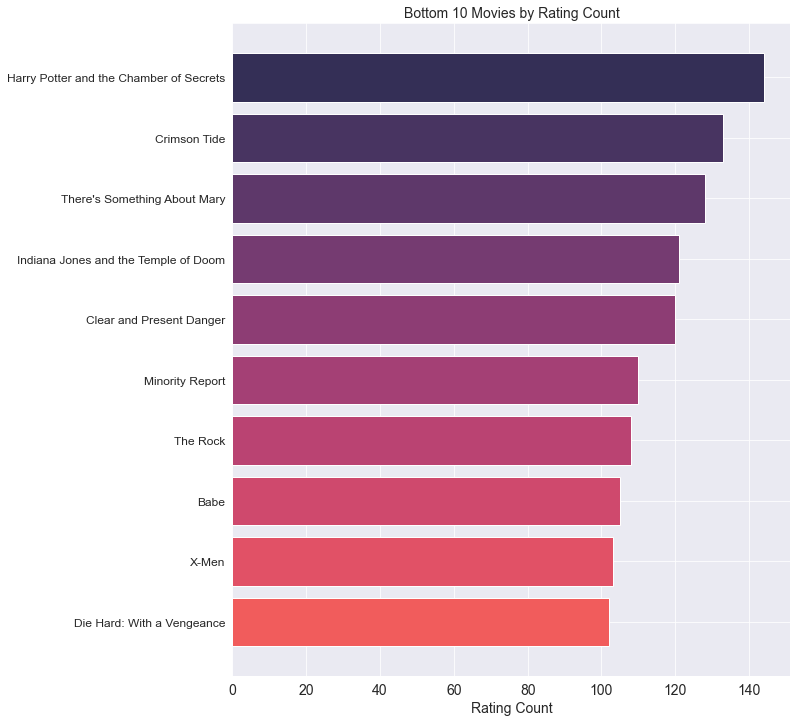

In [382]:
plt.figure(figsize=(10,12))

colors = ['#f15c5c','#e15166','#cf496d','#ba4372','#a44075','#8d3d74','#753b71','#5e386a','#483461','#342f56']

plt.barh(least_ratings.iloc[:10].sort_values(by='rating_count', ascending=0).title, least_ratings.iloc[:10].sort_values(by='rating_count', ascending=1).rating_count,
        color=colors)

plt.title("Bottom 10 Movies by Rating Count", fontsize=14)
plt.xlabel("Rating Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.savefig("bottommovies.png")
plt.show()

## We're now going to do some tag analysis
1. Most common words used to describe a movie

In [279]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\seanc\anaconda3\python.exe -m pip install --upgrade pip' command.


C:\Users\seanc\AppData\Local\Temp/ipykernel_16580/1039982736.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags['movieid']=tags['movieid'].astype('int')


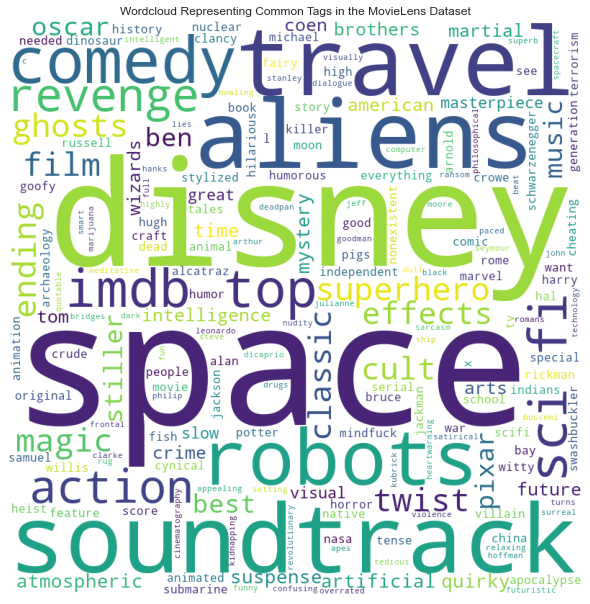

In [364]:
#Let's make a wordcloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

# Reads 'tags' file
tags = pd.read_csv("data/tags.csv", names=['userid', 'movieid', 'tag', 'timestamp'])
tags = df.iloc[1: , :]
tags['movieid']=tags['movieid'].astype('int')

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in tags.tag:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud Representing Common Tags in the MovieLens Dataset")
plt.savefig("all_wordcloud.png")
plt.show()


In [338]:
#Top rated movies w/ tags
most_ratings.head()

#Get the id's of top 10 movies then filter tags by them
top_10_id = np.array(most_ratings.head(20).movieid)

top_10_tags = tags[tags['movieid'].isin(top_10_id)]
top_10_tags.shape

(354, 4)

In [362]:
#Bottom rated movies w/tags

#Filter our movies by ratings > 25
least_ratings = m_r_a_c[m_r_a_c['rating_count'] > 25]
least_ratings.sort_values(by='average_rating', ascending=1, inplace=True)

bottom_10_id = np.array(least_ratings.head(50).movieid)

bottom_10_tags = tags[tags['movieid'].isin(bottom_10_id)]
bottom_10_tags.shape

(197, 4)

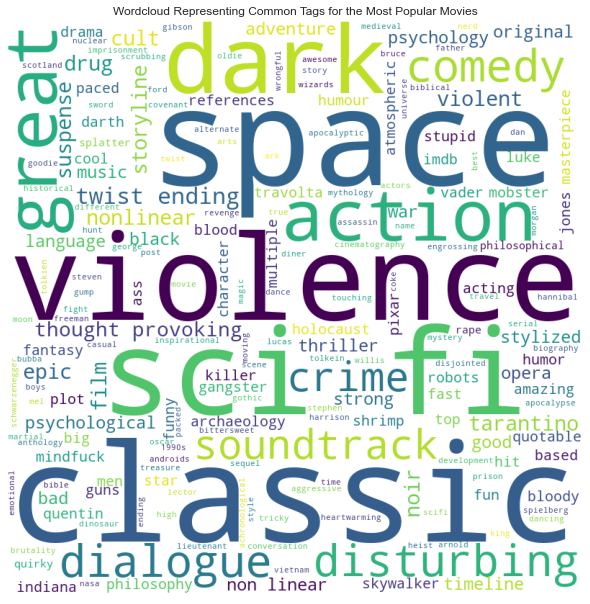

In [365]:
#Let's make a wordcloud

# Reads 'tags' file
df = top_10_tags
df = df.iloc[1: , :]

#Let's make a wordcloud for top and bottom rated movies
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.tag:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud Representing Common Tags for the Most Popular Movies")
plt.savefig("good_wordcloud.png")
plt.show()

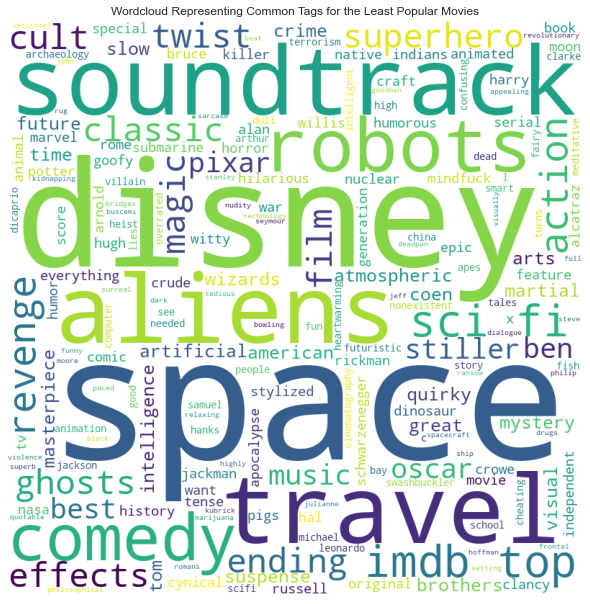

In [366]:
#Let's make a wordcloud

# Reads 'tags' file
df = bottom_10_tags
df = df.iloc[1: , :]

#Let's make a wordcloud for top and bottom rated movies
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.tag:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud Representing Common Tags for the Least Popular Movies")
plt.savefig("bad_wordcloud.png")
plt.show()

In [6]:
movies_ratings.genres

0         (Adventure,Animation,Children,Comedy,Fantasy)
1         (Adventure,Animation,Children,Comedy,Fantasy)
2         (Adventure,Animation,Children,Comedy,Fantasy)
3         (Adventure,Animation,Children,Comedy,Fantasy)
4         (Adventure,Animation,Children,Comedy,Fantasy)
                              ...                      
100813                (Action,Animation,Comedy,Fantasy)
100814                       (Animation,Comedy,Fantasy)
100815                                          (Drama)
100816                               (Action,Animation)
100817                                         (Comedy)
Name: genres, Length: 100818, dtype: object

## Let's try find the tags associated with the top genres
Top genres include:
1. Action
2. Adventure
3. Comedy Romance
4. Drama
5. Fantasy
6. Thriller

In [26]:
def count_genres(df):
    d={}
    
    g = ['Action','Adventure','Animation','Children\'s','Comedy',
              'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
              'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
    
    for genre in g:
        for index, row in df.iterrows():
            print(index)
            if genre in row.genres:
                if genre not in d.keys():
                    d[genre] = 1
                else:
                    d[genre] += 1
    return(d)

In [60]:
mov =pd.DataFrame.from_dict(d, orient='index', columns=['count']).sort_values(by='count', ascending=0).reset_index()
mov.rename(columns={'index':'genre'}, inplace=True)
mov.head()

,genre,count
0,Drama,41926
1,Comedy,39053
2,Action,30631
3,Thriller,26447
4,Adventure,24161


# The biggest genres by count

1. Drama
2. Comedy
3. Action
4. Thriller
5. Adventure
6. Romance
7. Sci-Fi
...
Let's make a histogram to show

Then let's better understand if the words in the tags of these genres actually describe them

<Figure size 576x576 with 0 Axes>

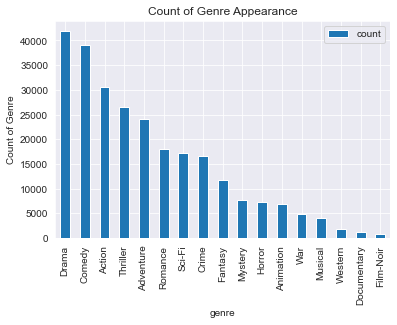

In [68]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
mov.plot.bar(x='genre', y='count')
plt.title('Count of Genre Appearance')
plt.ylabel('Count of Genre')
plt.savefig('../images/genre_count.png')
plt.show()

In [73]:
gs = []
dramas = movies_ratings[movies_ratings['genres'].str.contains('Drama')]
gs.append(dramas)
comedy = movies_ratings[movies_ratings['genres'].str.contains('Comedy')]
gs.append(comedy)
action = movies_ratings[movies_ratings['genres'].str.contains('Action')]
gs.append(action)
thriller = movies_ratings[movies_ratings['genres'].str.contains('Thriller')]
gs.append(thriller)
adventure = movies_ratings[movies_ratings['genres'].str.contains('Adventure')]
gs.append(adventure)
sci_fi = movies_ratings[movies_ratings['genres'].str.contains('Sci-Fi')]
gs.append(sci_fi)

In [94]:
dramas.movieid.unique()

array([     4,     11,     14, ..., 193567, 193571, 193585], dtype=int64)

In [89]:
#Let's first read in movies and tags datasets
movies = pd.read_csv('../data/movies.csv')
tags = pd.read_csv('../output/cleaned_tags/part-r-00000', sep='\t', header=None, names=['userid', 'movieid', 'tag', 'length'])

In [98]:
drama_tags = tags[tags['movieid'].isin(dramas.movieid.unique())]
drama_tags

,userid,movieid,tag,length
0,132,3556,(sofia coppola),13
6,166,293,"(assassin,jean reno)",17
14,184,5388,"(thought-provoking,insomnia,atmospheric)",36
16,184,27156,"(end of the world,anime,psychology,mecha,epic)",40
17,193,97938,"(surreal,cinematography,india)",26
...,...,...,...,...
1767,125,1726,"(kevin costner,post apocalyptic)",29
1770,125,5088,(irreverent),10
1771,125,7022,"(survival,based on a book,bloody,brutal,contro...",97
1772,125,7254,"(science fiction,time travel,sci-fi,alternate ...",49


In [99]:
gss=[]
for g in gs:
    df = tags[tags['movieid'].isin(g.movieid.unique())]
    gss.append(df)

In [121]:
gss

[      userid  movieid                                                tag  \
 0        132     3556                                    (sofia coppola)   
 6        166      293                               (assassin,jean reno)   
 14       184     5388           (thought-provoking,insomnia,atmospheric)   
 16       184    27156     (end of the world,anime,psychology,mecha,epic)   
 17       193    97938                     (surreal,cinematography,india)   
 ...      ...      ...                                                ...   
 1767     125     1726                   (kevin costner,post apocalyptic)   
 1770     125     5088                                       (irreverent)   
 1771     125     7022  (survival,based on a book,bloody,brutal,contro...   
 1772     125     7254  (science fiction,time travel,sci-fi,alternate ...   
 1774     125     9010                                 (cruel characters)   
 
       length  
 0         13  
 6         17  
 14        36  
 16       

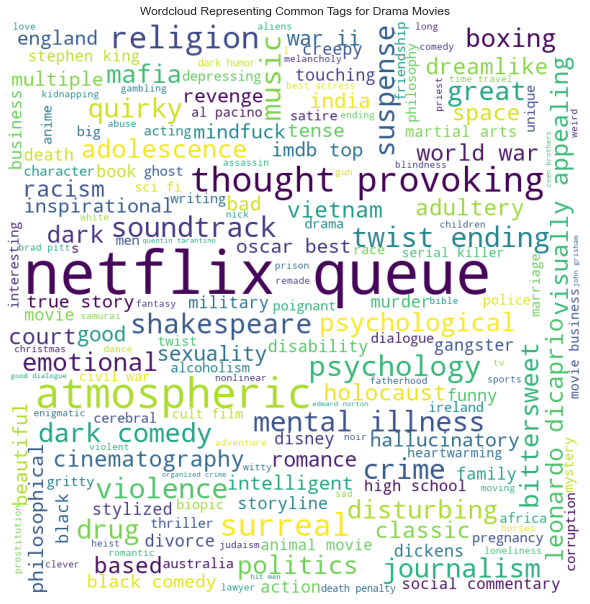

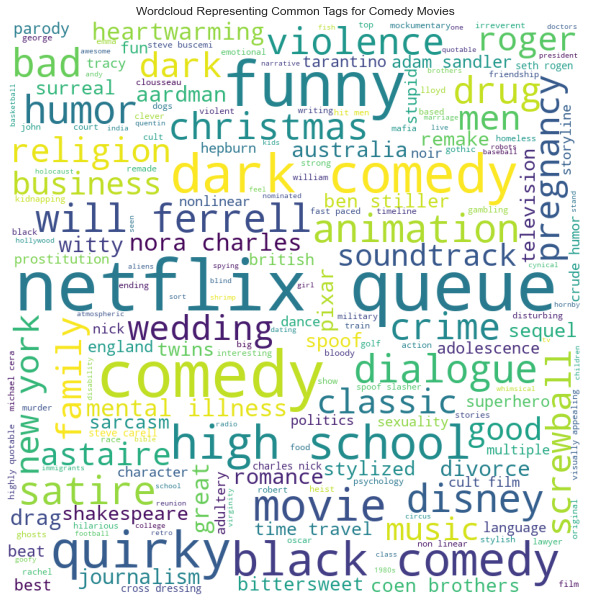

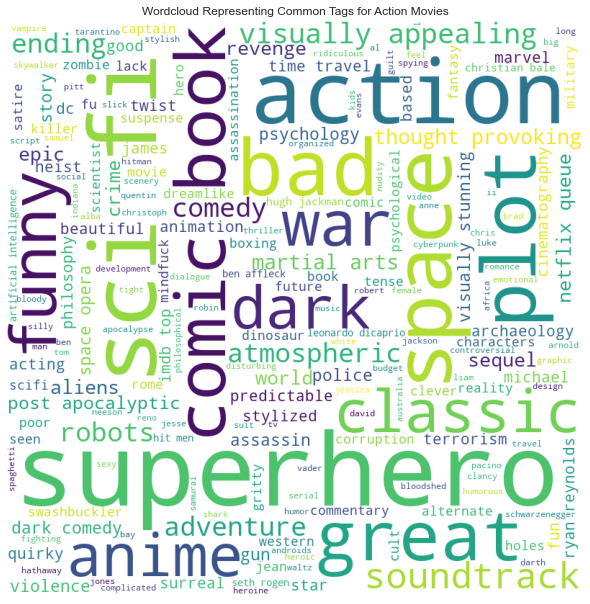

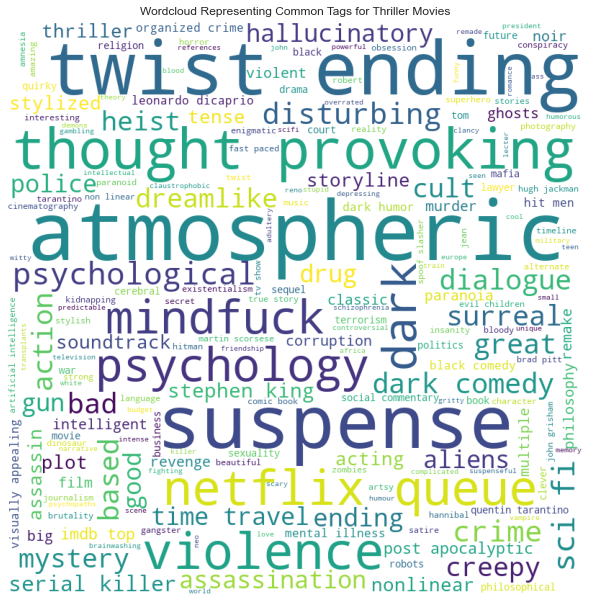

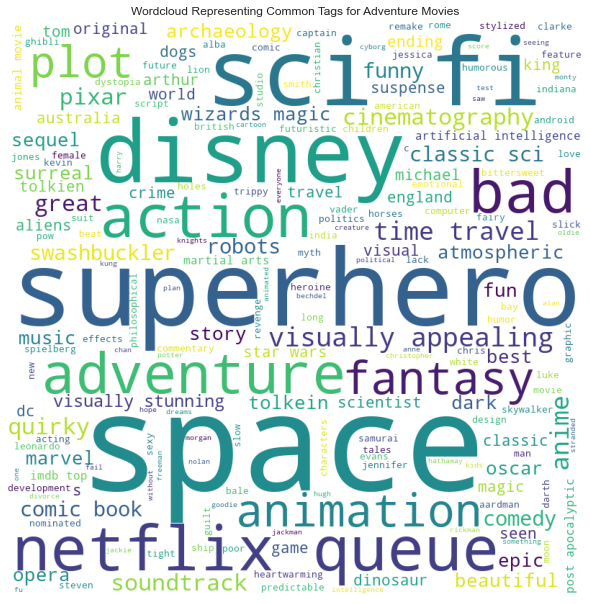

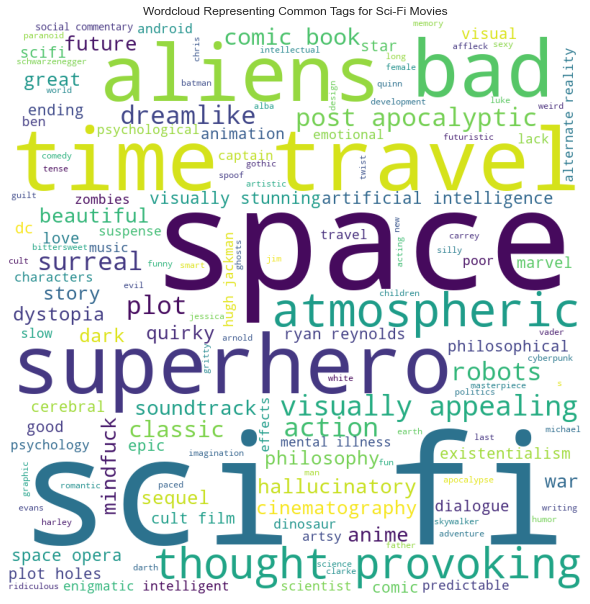

In [126]:
from wordcloud import WordCloud, STOPWORDS
#Let's make a wordcloud for each genre

categories = ['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Sci-Fi']

k = 0
for g in gss:
    # Reads 'tags' file

    #Let's make a wordcloud for top and bottom rated movies
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in g.tag:

        # typecaste each val to string
        val = str(val)
        val = val[1:]
        val = val[:-1]

        # split the value
        tokens = val.split(',')

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(f"Wordcloud Representing Common Tags for {categories[k]} Movies")
    plt.savefig(f"{categories[k]}.png")
    k+=1
    plt.show()